In [1]:
# updated for the trial on
# dz 6/16/22
# 7/21/22 dz change the raw data to df
# 7/21/22 dz add psth analysis
# 8/2/22 dz changed to delta f . the method is green signal minus the mean of all ctr
# 8/6/22 read the .csv file Don't need to type in the file name
# 8/7/22 dz add 1. analyze the successful trial 2. normalization by trial, and average across trials
# 8/20/22 dz add detrend both the sig and the ctr
# 8/25/22 dz add the selection of the reward trials
# 8/30 dz modified the code to select the trial ti
# 9/12 dz change to import 'Calcium_data.npy'
# 9/17 dz change this script for pav


In [2]:
from datetime import datetime
start_time = datetime.now()

In [3]:
#p_mother = 'C:/Users/Lab_PC1/Documents/fiberPhotometryData/analyzed_data/'
p_mother = 'C:/Users/Lab_PC1/Documents/fiberPhotometryData/analyzed_data_innpy/'
mouse_id = 'dz15'
rec_d    = '20221015/'
p = p_mother + mouse_id
fn =  mouse_id + rec_d
print(p)
import os
os.chdir(p)

C:/Users/Lab_PC1/Documents/fiberPhotometryData/analyzed_data_innpy/dz15


In [4]:
import numpy as np
import pandas as pd
new_num_arr = np.load(rec_d[0:-1]+'.npy', allow_pickle=True) # load
calcium_arr = new_num_arr[:,0:3] 
time  = calcium_arr[:,0]
sig   = calcium_arr[:,1]
pulse = calcium_arr[:,2]
df = pd.DataFrame(calcium_arr, columns = ['Time','Sig','Pulse'])
display(df.head(3))

,Time,Sig,Pulse
0,0.000000,0.215767,248.000000
1,0.000100,0.127312,248.000000
2,0.000200,0.071397,248.000000


In [5]:
# change from str to int
df['Sig']   = pd.to_numeric(df['Sig'])
df['Pulse'] = pd.to_numeric(df['Pulse'])
df['Time']  = pd.to_numeric(df['Time'])

df.head(3)
#df2.Pulse
#print(max(df2['Pulse']))
#print(min(df2['Pulse']))

,Time,Sig,Pulse
0,0.0000,0.215767,248.0
1,0.0001,0.127312,248.0
2,0.0002,0.071397,248.0


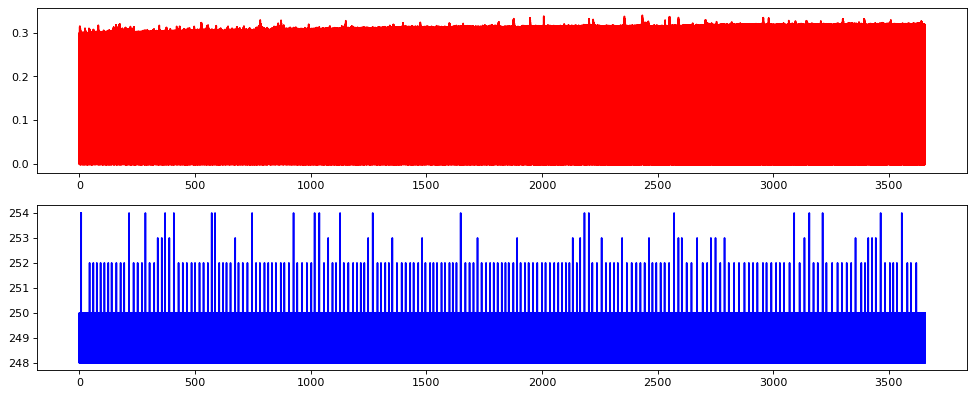

Text(0.5, 0, 'pulse value')

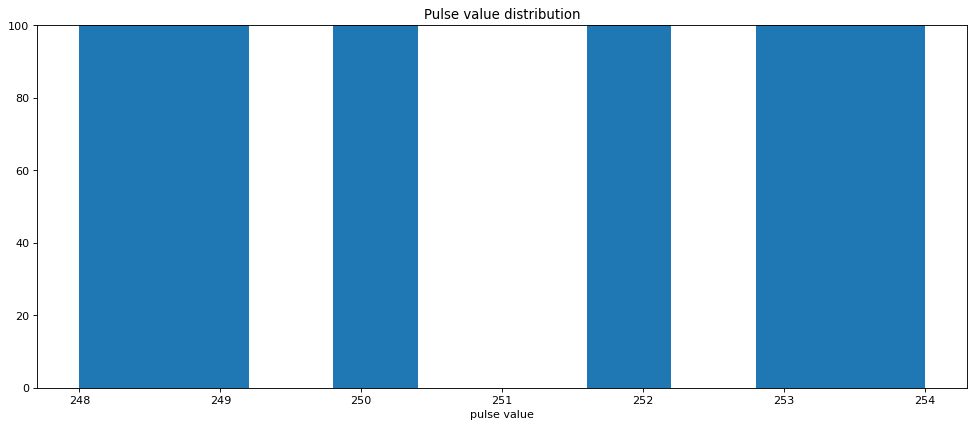

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,6), dpi=80)
plt.subplot(211)
plt.plot(df['Time'],df['Sig'],'r')

plt.subplot(212)
plt.plot(df['Time'],df['Pulse'],'b')
#plt.xlim(43.398,43.399)
# Display result
plt.show()

figure(figsize=(15,6), dpi=80)
plt.hist(df['Pulse'])
plt.ylim(0,100)
plt.title('Pulse value distribution')
# Give x axis label for the spike raster plot
plt.xlabel('pulse value')

In [7]:
# from the last session, we know there are three value 252 is the baseline, 253 is pulse 1 and 254 is pulse 2.
#base = -10.577928 #is the baseline
ctr_amp = 249.0 # ctrl pulse
sig_amp = 250.0 #  gcamp pulse
trial_start_amp = 252.0 #  CueOn pulse ? You must make sure this is correct

print(max(df.Pulse))
print(min(df.Pulse))

254.0
248.0


In [8]:
#ctr_df
ctr_df  = df[df.Pulse == ctr_amp]# select the rows where pul1_amp
#print(ctr_df)
Cal_df  = df[df.Pulse == sig_amp]# select the rows where pul2_amp
#print(Cal_df)
trig_df = df[df.Pulse >= trial_start_amp]# select the rows where pul2_amp
#print(trig_df)

trial_dat = trig_df['Time']
ctr_dat   = ctr_df['Sig']
Cal_dat   = Cal_df['Sig']

ctr_ind  = list(ctr_dat.index)
Cal_ind  = list(Cal_dat.index)
t_df     = Cal_df['Time']
t_ctr_df = ctr_df['Time']
#print(len(ctr_ind))
#print(len(Cal_ind))
display(trial_dat.head(3).append(trial_dat.tail(3)))

60699          6.0699
60700          6.0700
60701          6.0701
36183153    3618.3332
36183154    3618.3333
36183155    3618.3334
Name: Time, dtype: float64

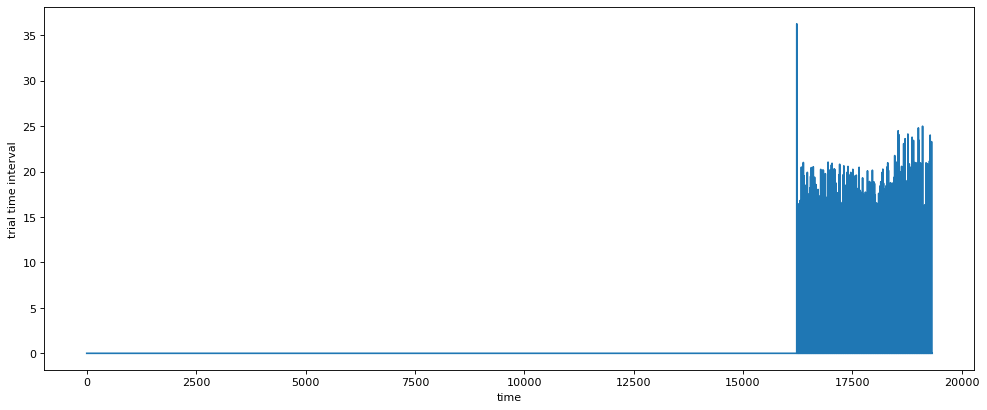

In [9]:
trial_time_arr = np.array(trial_dat)
tmp1           = np.diff(trial_time_arr)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize =(15,6), dpi=80)
plt.plot(tmp1)
#plt.xlim(0,25)
plt.ylabel('trial time interval')
plt.xlabel('time')
plt.show()
trig_on        = np.where(tmp1>10)
cc             = np.array(trig_on)
cc2            = cc + 1
#print(cc2)

trial_on_ind = np.concatenate((0,cc2),axis = None)
#print(trial_on_ind)
trial_dat_reset = trial_dat.reset_index(drop = True)
#print(trial_dat_reset.head(30))
trial_on_time = trial_dat_reset.iloc[trial_on_ind]
#display(trial_on_time)
#print(trial_dat_reset.iloc)
trial_on_time_reset = trial_on_time.reset_index(drop = True)
#display(trial_on_time_reset)
np.savetxt("trial_on.csv", trial_on_time, delimiter=",")

In [10]:
# reward time
import os
entries = os.listdir()
li = []
for file in entries:
    # Check whether file is in text format or not
    if file.endswith("use_df.csv"):
        use_fn = file
        print(use_fn)

In [11]:
import numpy as np
ctr_ind_arr = np.array(ctr_ind)
tmp1        = np.diff(ctr_ind_arr)

x1          = np.where(tmp1>1)

Cal_ind_arr = np.array(Cal_ind)

tmp2        = np.diff(Cal_ind_arr)

x2          = np.where(tmp2>1)
print(np.shape(x2))
np.shape(x2)
np.shape(x1)
print(len(t_df))

(1, 110720)
1660677


In [12]:
ctr_dat_df = ctr_dat.iloc[x1]
#print(ctr_dat_df)
Cal_dat_df = Cal_dat.iloc[x2]
#print(Cal_dat_df)
t_ctr = t_ctr_df.iloc[x1]
t_sig = t_df.iloc[x2]
#print(t_ctr)
#print(t_sig)

In [13]:
# reset the index for subtraction
# zd changed to ddf 8/1/2022
# zd add detrending on 8/20/2022
import statistics
pul1r = ctr_dat_df.reset_index(drop=True)
pul2r = Cal_dat_df.reset_index(drop=True)

from scipy import signal
ctr_detrended = signal.detrend(pul1r)
sig_detrended = signal.detrend(pul2r)

print(pul1r.mean())
#print(pul2r)
constant = 0.3
m_ctr = ctr_detrended.mean()+constant
print(m_ctr)
#ddf = (pul2r+constant-m_ctr)/m_ctr  # this method there will be drifting
ddf = (sig_detrended+constant-m_ctr)/m_ctr  # this method there will be drifting
#ddf = (pul2r-pul1r)/m_ctr  # this method there will be no drifting
print(ddf.mean())

0.308689048608175
0.29999999999999977
1.4837200190366254e-16


198


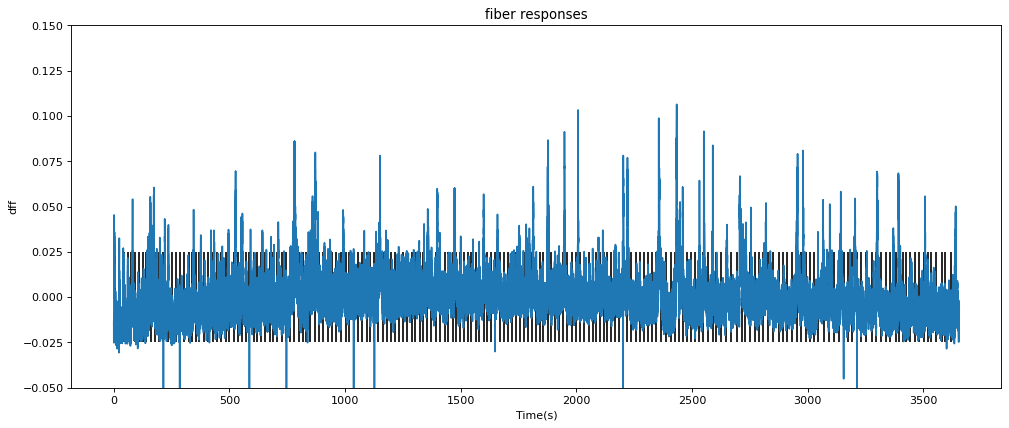

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,6), dpi=80)

#plt.plot(t,diff_sig)
#plt.plot(t,df)
colorCodes = np.array([[0, 0, 0],
                        [1, 0, 0],
                        [0, 1, 0]])
lineSize = [0.05, 0.02]
plt.plot(t_sig,ddf)
#print(ddf)
plt.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets = 0,linelengths = lineSize[0])  
#plt.eventplot(rw_time, color = colorCodes[1,:], lineoffsets = 0,linelengths = lineSize[0])  
#plt.eventplot(miss_rw_time, color = colorCodes[2,:], lineoffsets = 0,linelengths = lineSize[0])  


print(len(trial_on_time))
#plt.plot(ddf)
plt.title('fiber responses')
# Give x axis label for the spike raster plot
plt.xlabel('Time(s)')
plt.ylim(-0.05, 0.15)
#plt.xlim(0,200)
plt.ylabel('dff')

plt.show()

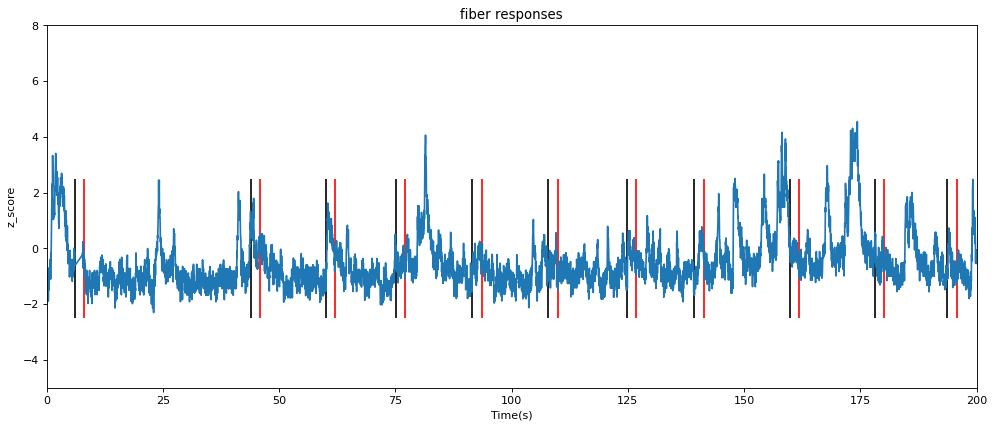

In [15]:
#from scipy.stats import zscore
from scipy import stats
#import statistics as stats
#print(ddf)
#ddf_ar = ddf.to_numpy()
ddf_ar = ddf.copy()
#print(ddf_ar)
z_score_aad = stats.zscore(ddf_ar)
#print(z_score_aad)
figure(figsize=(15,6), dpi=80)

colorCodes = np.array([[0, 0, 0],
                        [1, 0, 0],
                        [0, 1, 0]])
lineSize = [0.05, 0.02]
plt.plot(t_sig,z_score_aad)
rw_time = trial_on_time+2
plt.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets = 0,linelengths = 5)  
plt.eventplot(rw_time, color = colorCodes[1,:], lineoffsets = 0,linelengths =  5)  
#plt.eventplot(miss_rw_time, color = colorCodes[2,:], lineoffsets = 0,linelengths = 5)

plt.title('fiber responses')
# Give x axis label for the spike raster plot
plt.xlabel('Time(s)')
plt.ylim(-5, 8)
plt.xlim(0, 200)
plt.ylabel('z_score')

plt.show()

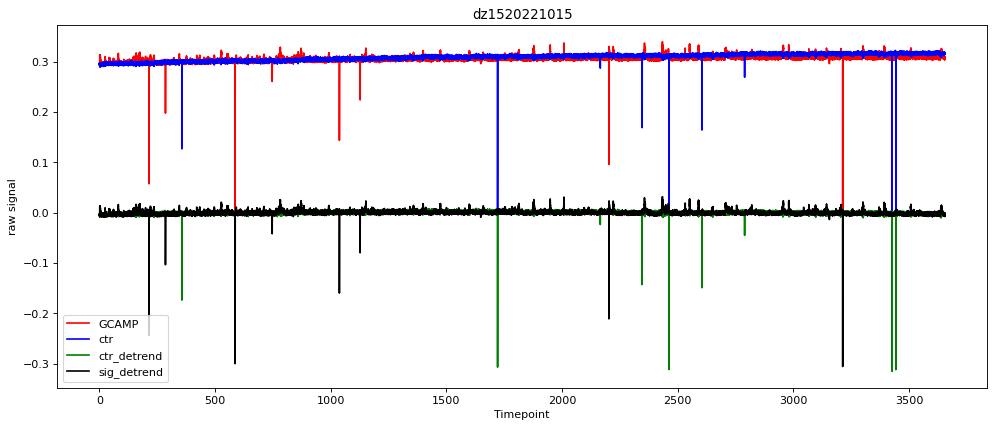

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,6), dpi=80)
#plt.subplot(211)

plt.plot(t_sig,pul2r,'r',label = 'GCAMP')
plt.plot(t_ctr,pul1r,'b',label = 'ctr')
plt.plot(t_ctr,ctr_detrended,'g',label = 'ctr_detrend')
plt.plot(t_sig,sig_detrended,'k',label = 'sig_detrend')


#plt.ylim(0.2, 0.4)
plt.legend(loc='best')
plt.xlabel('Timepoint')
plt.ylabel('raw signal')
plt.title(fn[0:-1])
plt.show()

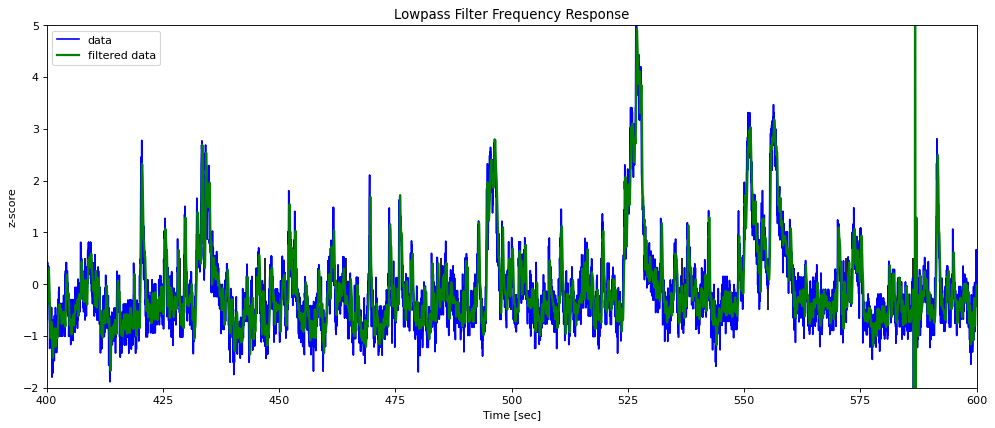

In [17]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,6), dpi=80)

def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
#plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 12.0         # seconds
n = int(T * fs) # total number of samples
t = t_ctr
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
#data = pul2r
data = z_score_aad

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

#plt.subplot(2, 1, 2)
plt.plot(t_sig,data, 'b-', label='data')
plt.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets=0,linelengths = 1)  
#plt.eventplot(rw_time, color = colorCodes[1,:], lineoffsets = 0,linelengths = 2)  


plt.plot(t_sig,y, 'g-', linewidth=2, label='filtered data')
plt.ylim(-2,5)
#plt.xlim(0,1600)

plt.xlim(400,600)
plt.ylabel('z-score')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [18]:
# psth  people usally plot heat map. 
# dz add on 6/16/22
import seaborn as sns; sns.set_theme()
trial_num = trial_on_time.size
win = [-5,10]
samp_rate = 10000
trial_num
type(t_sig)
type(data)
# construct a dataframe

t_sig_res = t_sig.reset_index(drop=True)
t_sig_res
df_n = pd.DataFrame({'time': t_sig_res, 'data': data})
df_n

,time,data
0,0.0107,-1.020278
1,0.0437,-1.336824
2,0.0767,-1.574240
3,0.1097,-0.941472
4,0.1427,-1.257768
...,...,...
110715,3655.3079,-0.436581
110716,3655.3409,-1.069648
110717,3655.3739,-0.278370
110718,3655.4069,-0.753176


(198, 198)
6.5699


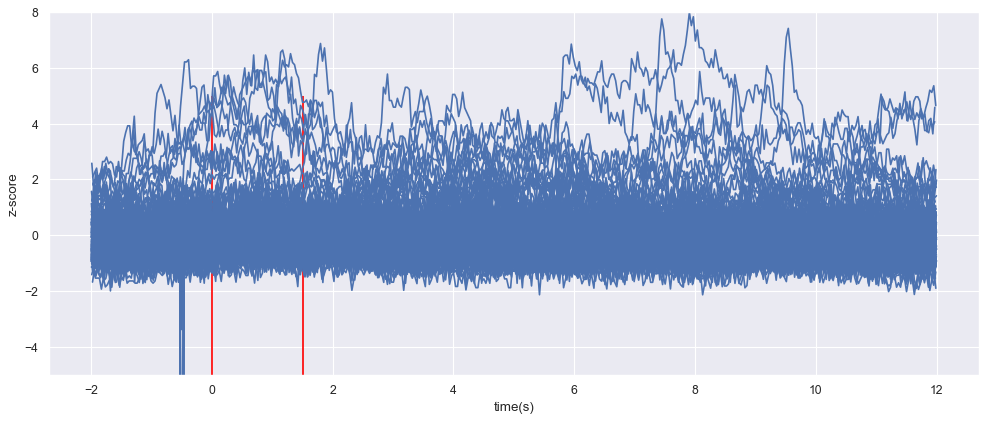

In [19]:
# plt each trials
transient_matrix = np.zeros((len(trial_on_time),trial_num))

cue_on_time = trial_on_time+0.5# 0.5s after the trial on the cue will be on 
#time_wid = [-2:12]
print(np.shape(transient_matrix))
#transient_matrix = []
figure(figsize=(15,6), dpi=80)
aa = [];
trial_n = 0

print(cue_on_time[0])
for i in cue_on_time:
    winStart = i - 2 # 2s before cue
    winEnd   = i + 12  # 12s after cue
    
    #print(trial_n)
    #print(winStart)
    #print(winEnd)
    trancient = df_n.loc[(df_n["time"] > winStart) & (df_n["time"] <  winEnd)]
    #print(trancient)
    t_reset = (trancient["time"]-i)
    ave_transient = pd.DataFrame(trancient['data']).to_numpy()
    #print(np.shape(ave_transient))
    ave_transient = transient_matrix[:,trial_n] 
    trial_n = trial_n + 1
    #print(i)
    #vv = np.concatenate((ave_transient, transient_matrix), axis=1)
    #tmp = pd.concat([trancient['data'],aa],axis = 1)
    #print(t_reset)
    plt.plot(t_reset,trancient['data'], 'b-', label='data')
    #plt.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets=0,linelengths = 1)  
    
plt.ylim(-5, 8)
#plt.legend(loc='best')
plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 10)  
plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 10)  
plt.xlabel('time(s)') 
plt.ylabel('z-score')
    #plt.title(fn[0:-4])
    #ave_transient = pd.DataFrame(trancient['data']).to_numpy()
plt.show() 

#ave_transient
#trancient['data']

198


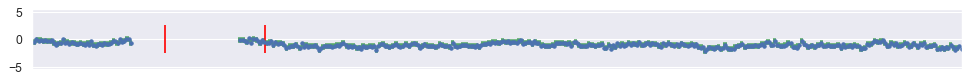

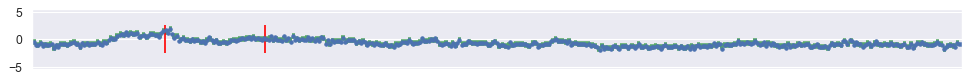

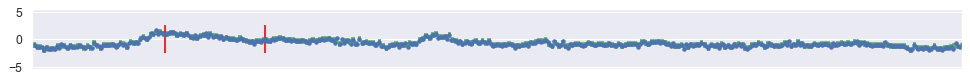

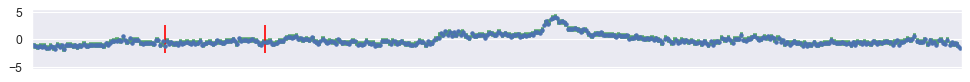

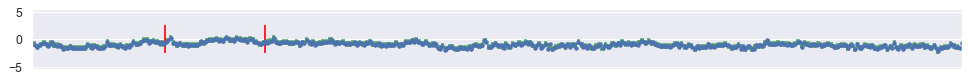

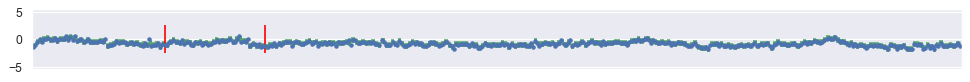

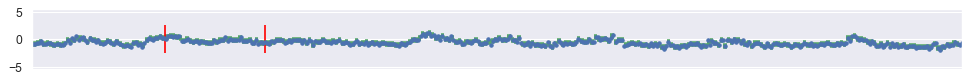

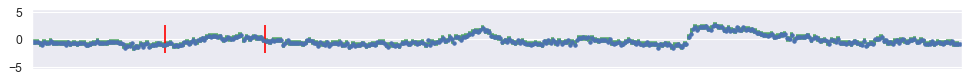

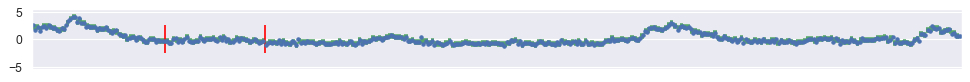

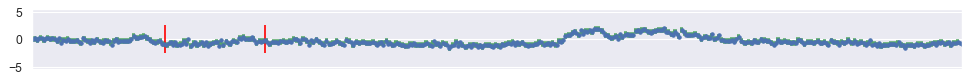

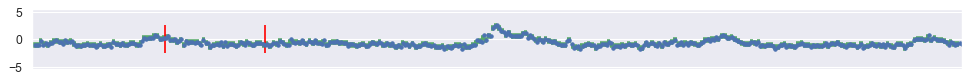

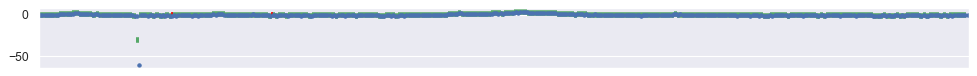

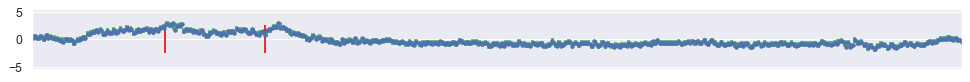

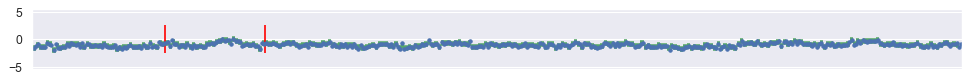

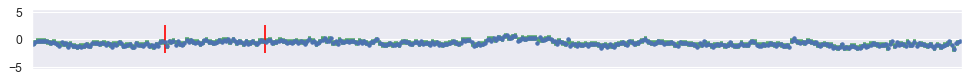

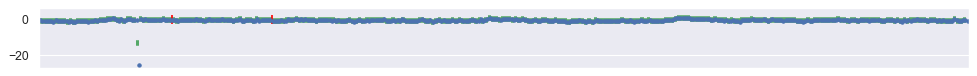

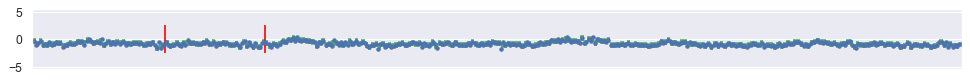

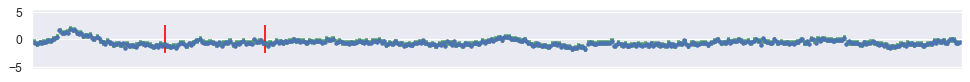

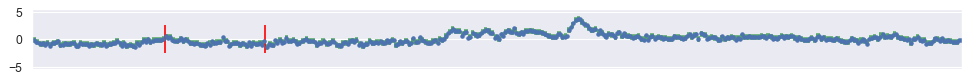

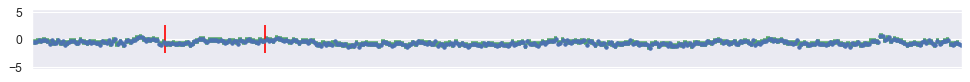

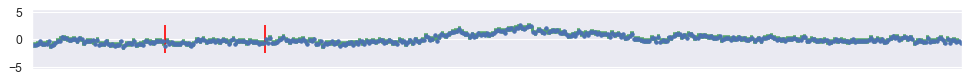

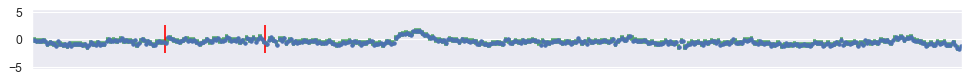

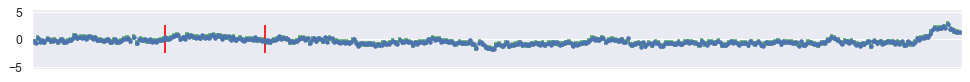

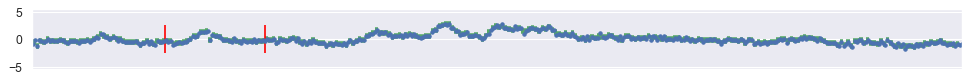

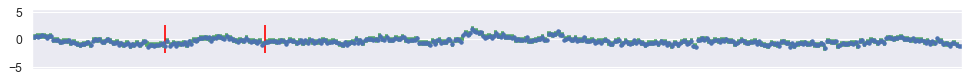

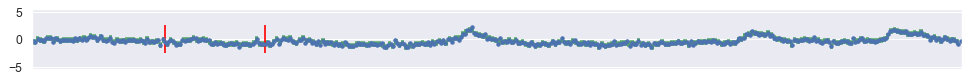

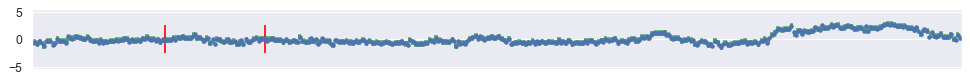

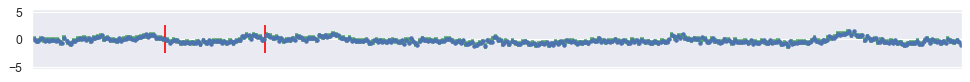

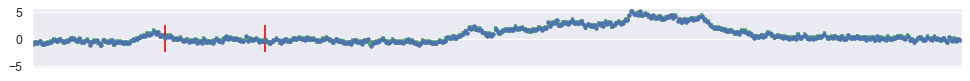

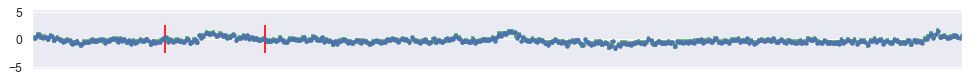

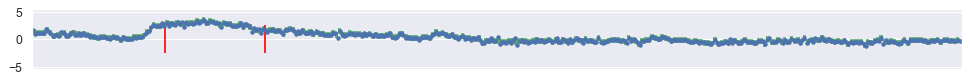

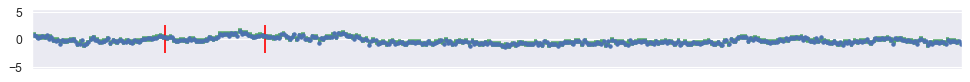

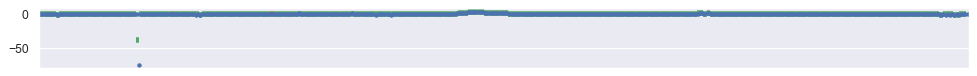

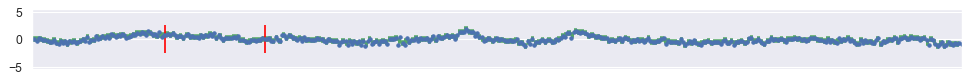

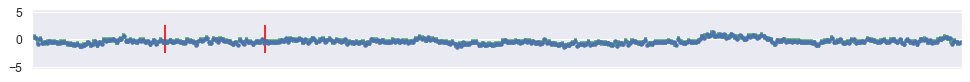

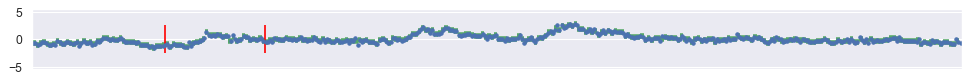

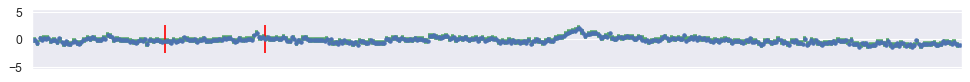

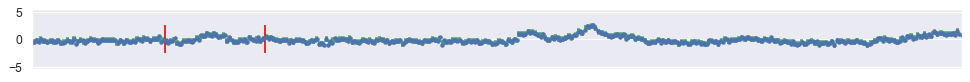

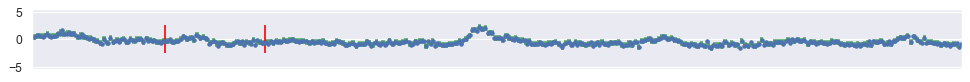

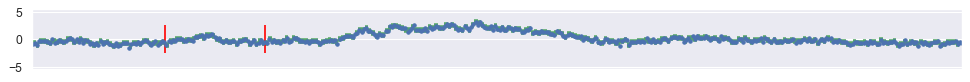

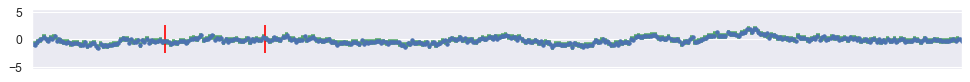

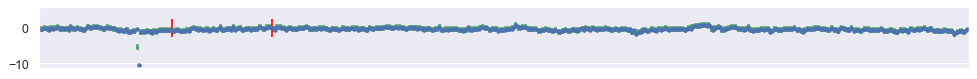

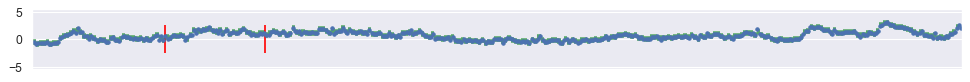

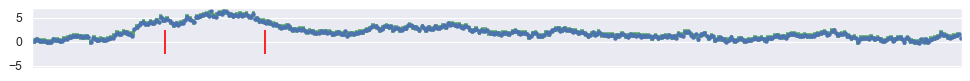

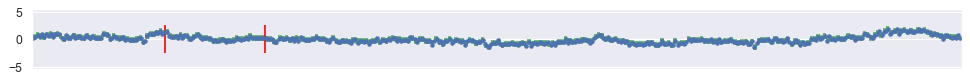

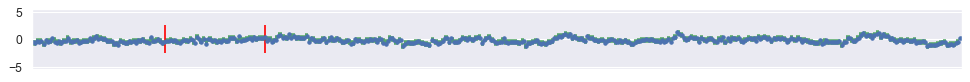

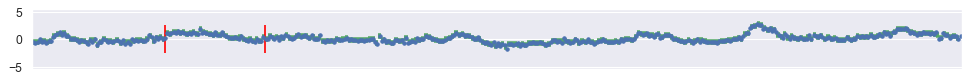

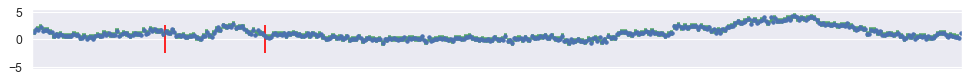

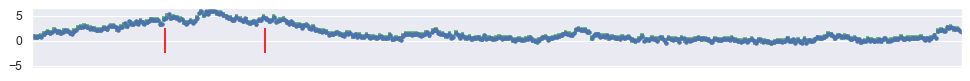

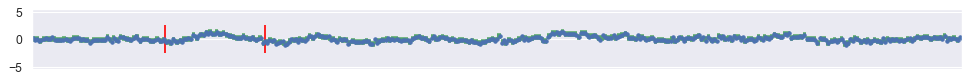

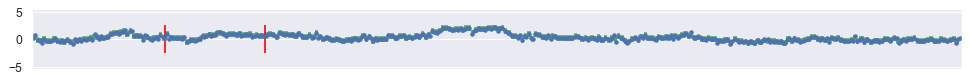

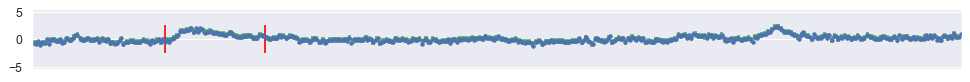

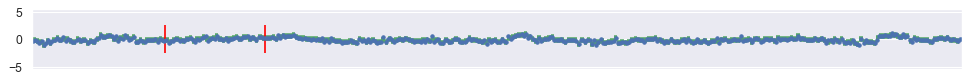

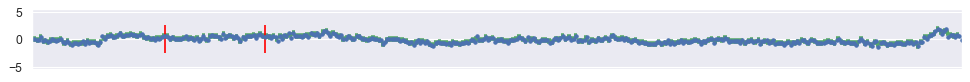

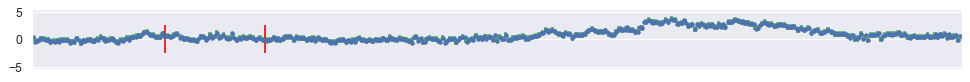

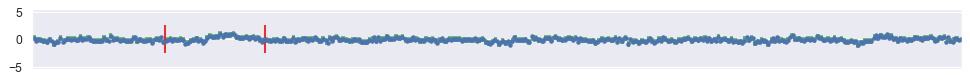

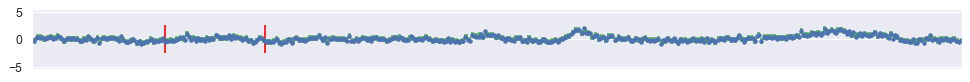

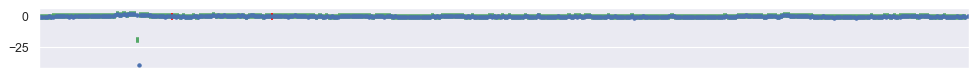

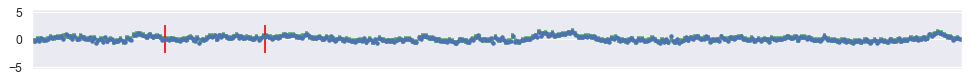

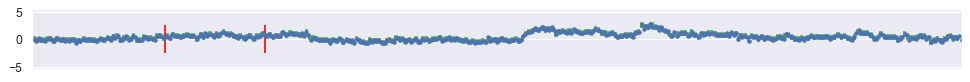

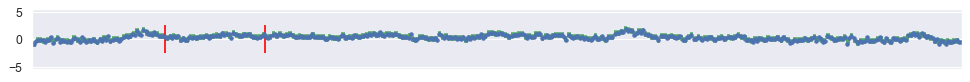

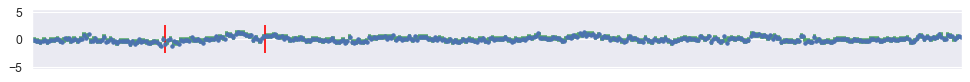

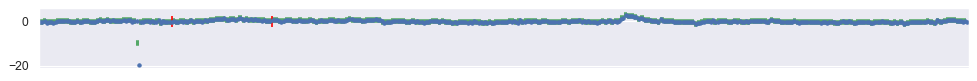

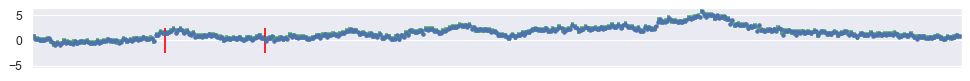

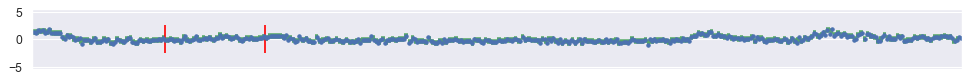

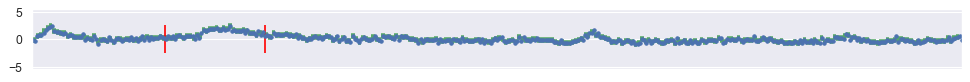

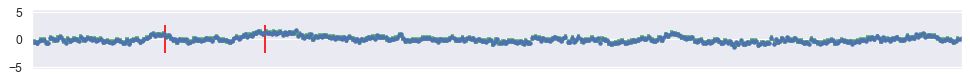

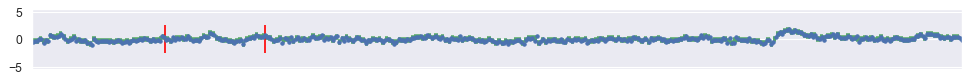

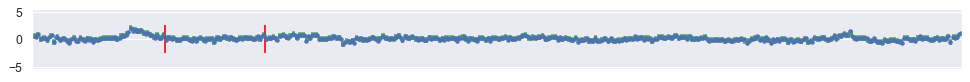

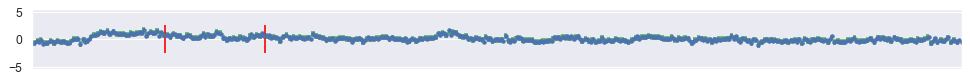

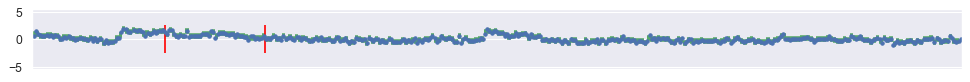

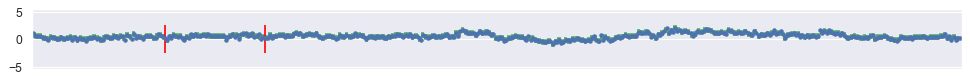

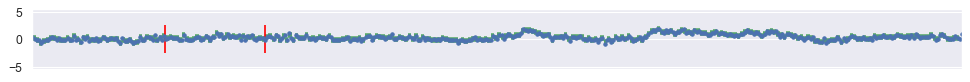

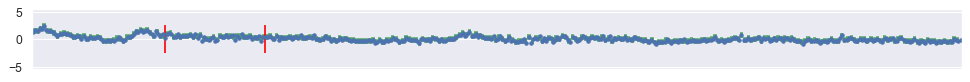

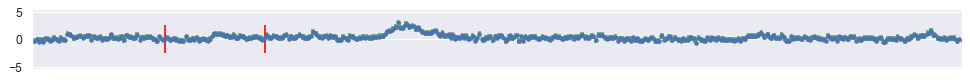

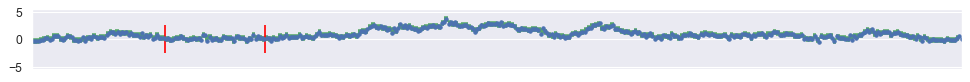

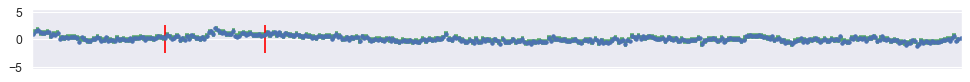

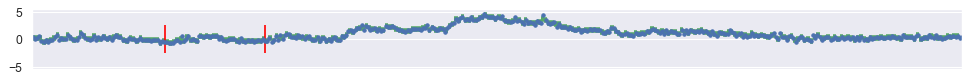

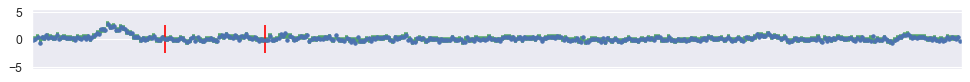

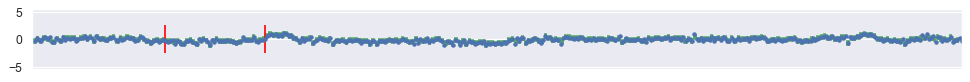

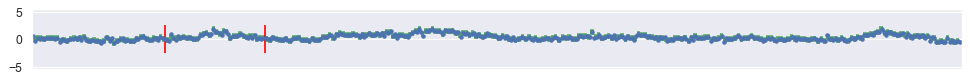

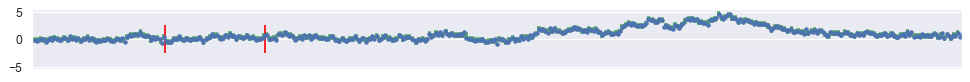

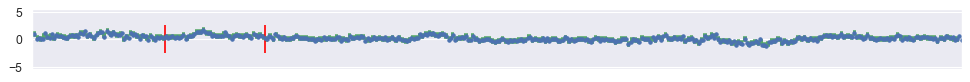

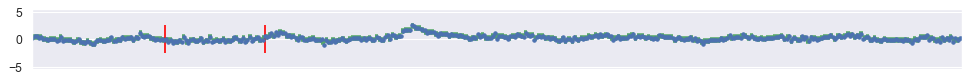

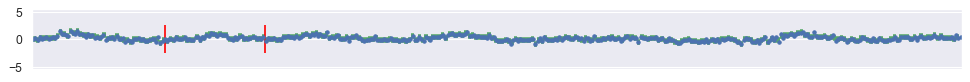

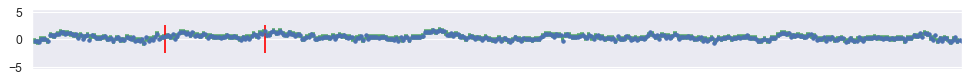

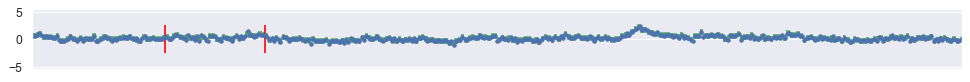

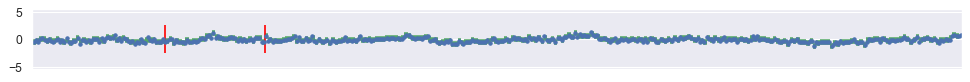

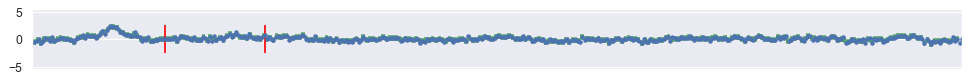

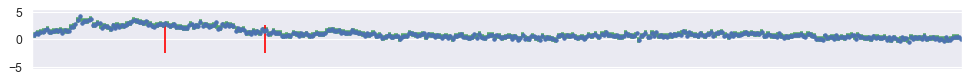

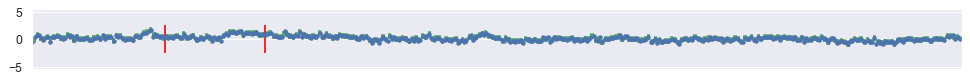

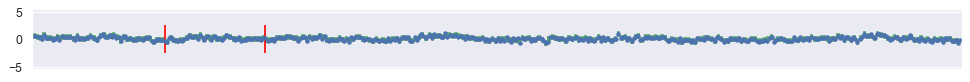

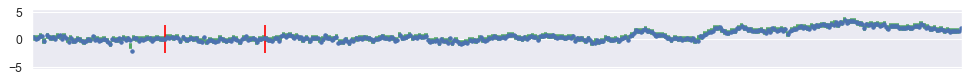

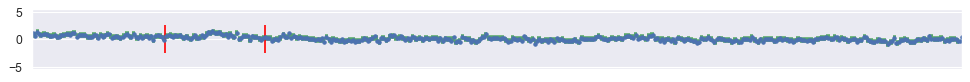

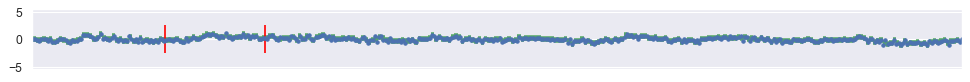

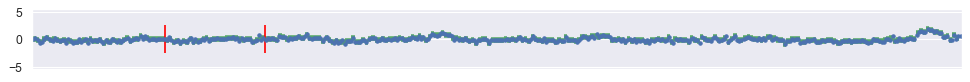

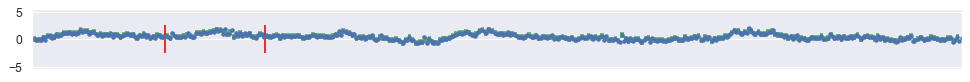

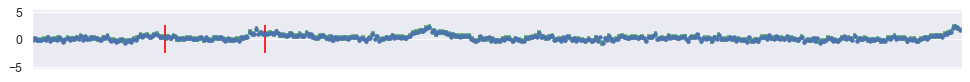

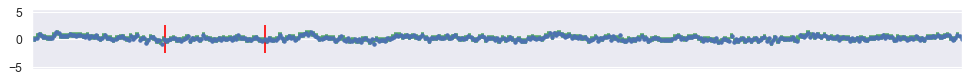

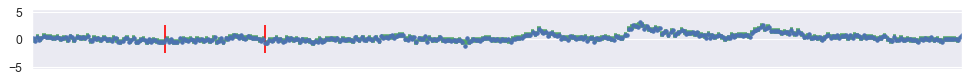

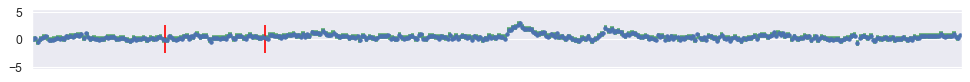

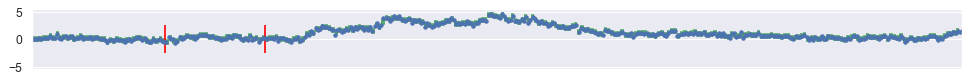

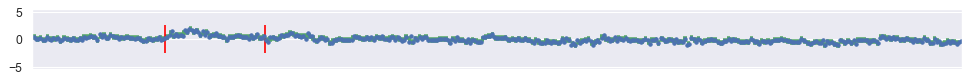

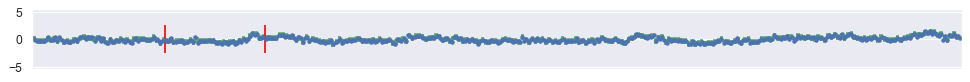

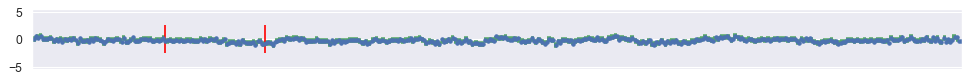

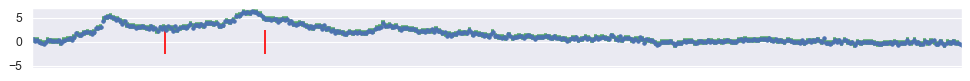

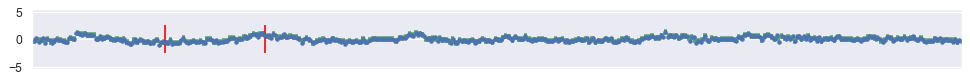

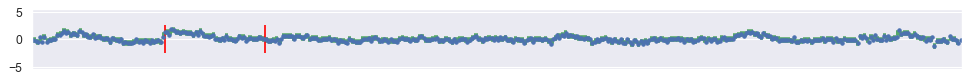

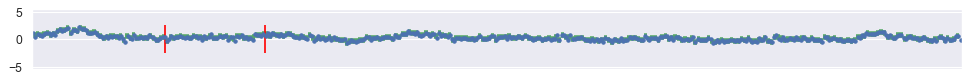

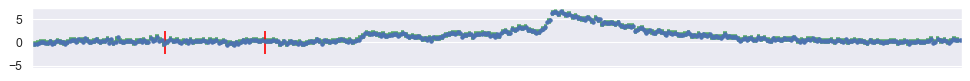

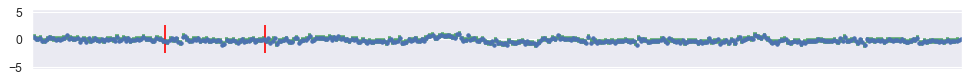

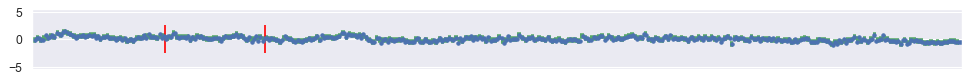

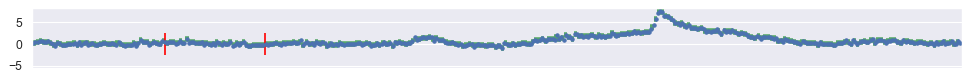

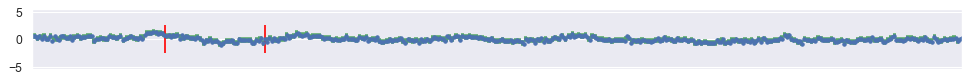

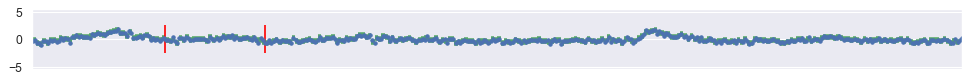

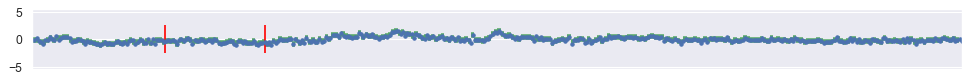

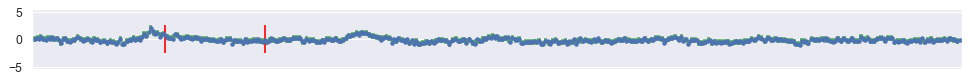

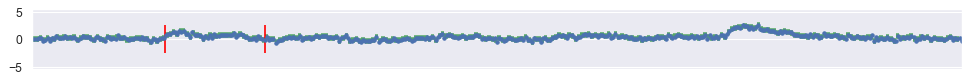

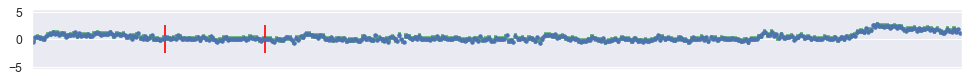

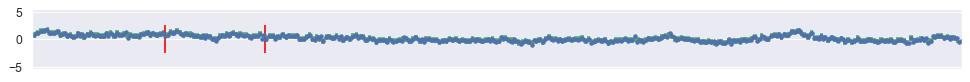

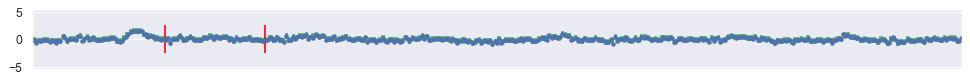

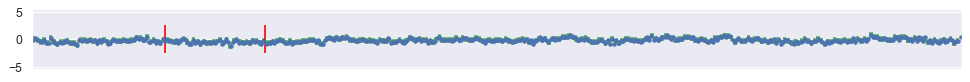

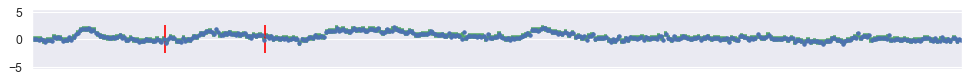

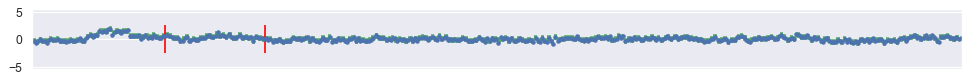

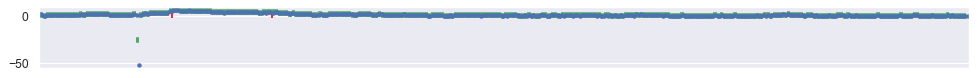

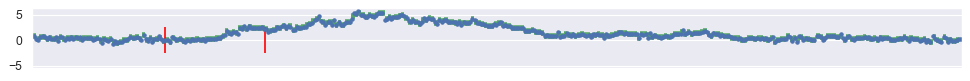

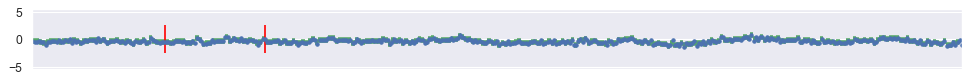

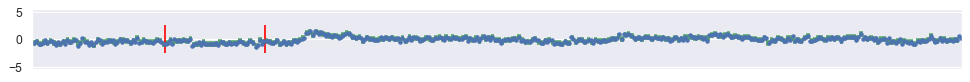

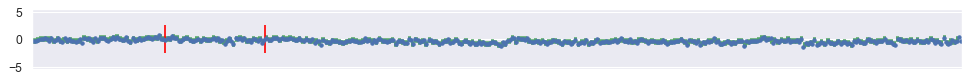

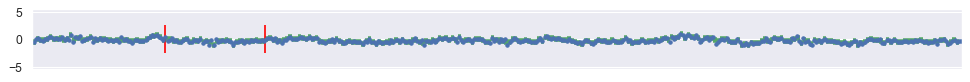

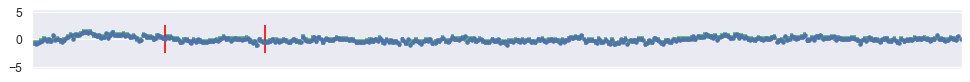

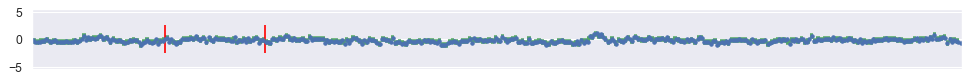

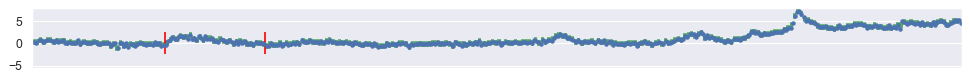

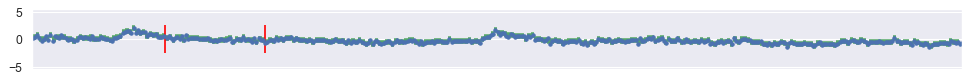

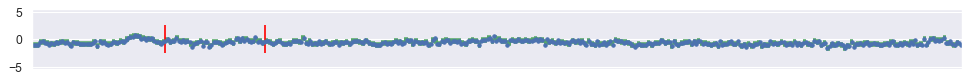

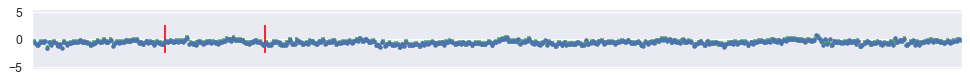

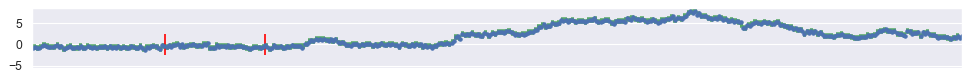

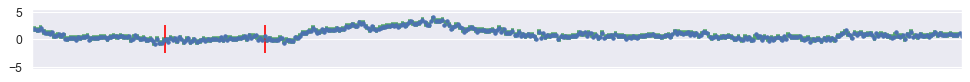

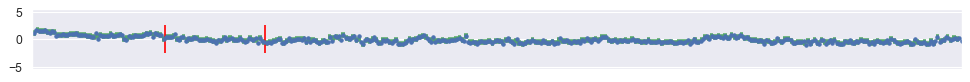

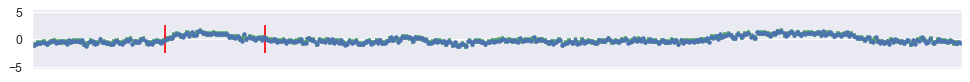

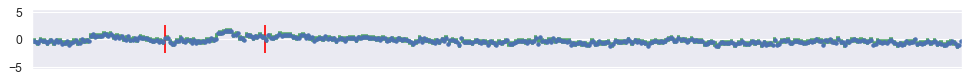

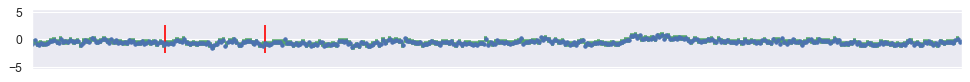

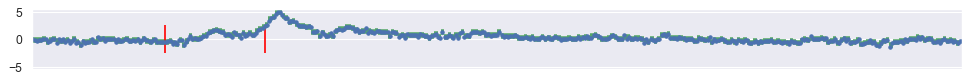

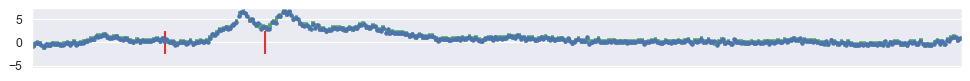

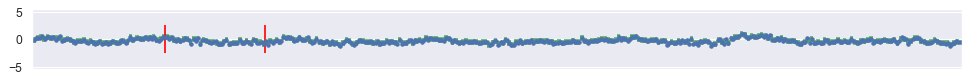

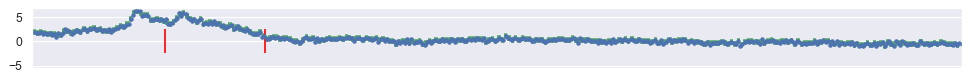

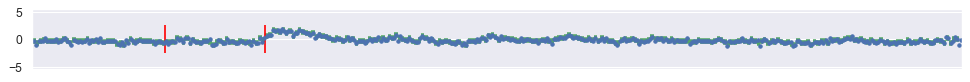

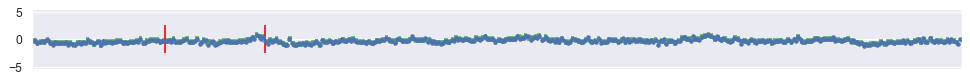

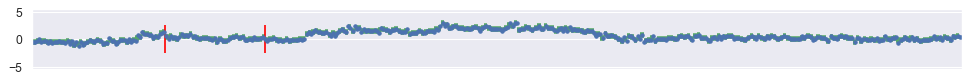

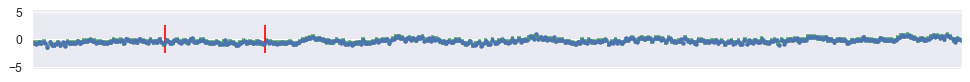

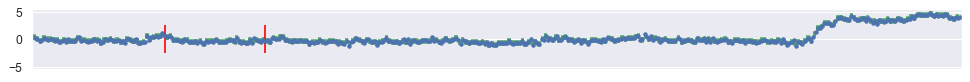

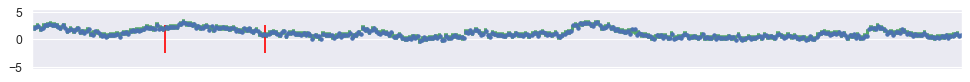

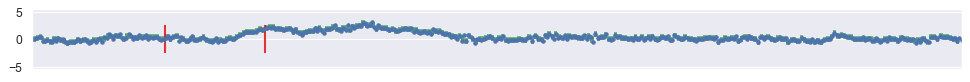

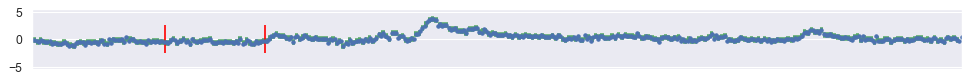

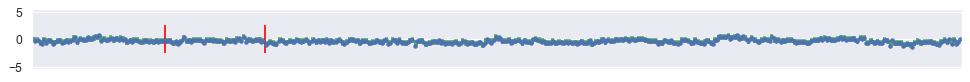

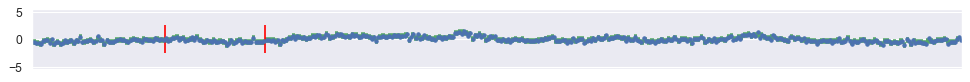

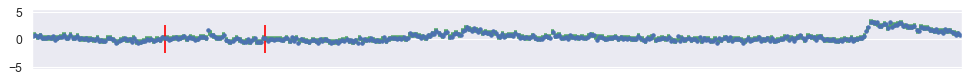

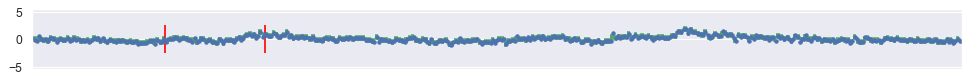

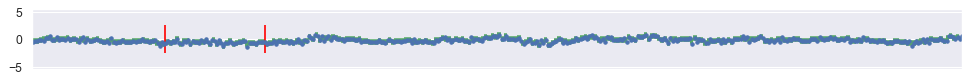

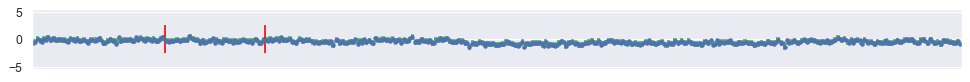

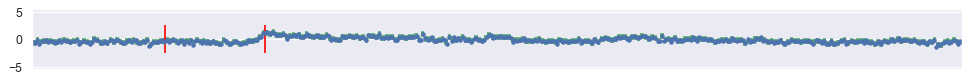

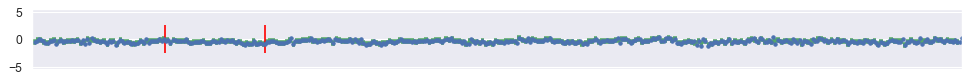

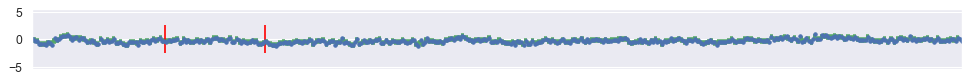

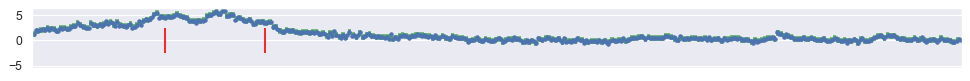

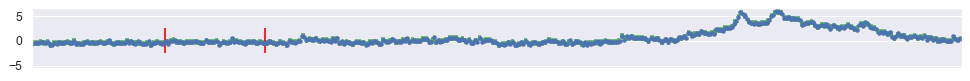

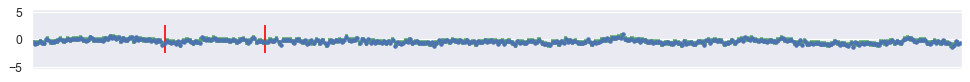

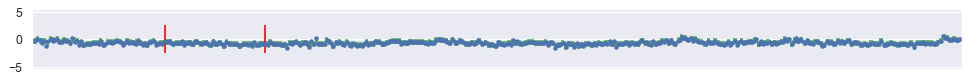

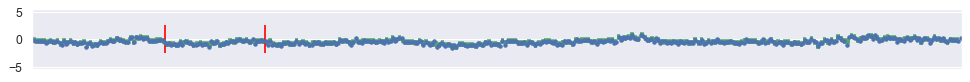

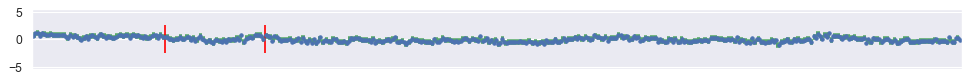

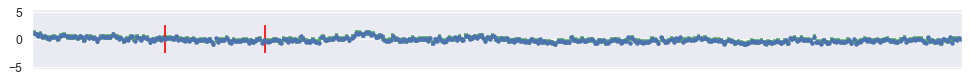

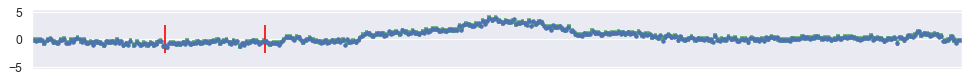

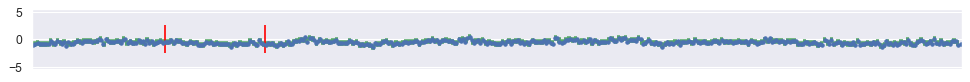

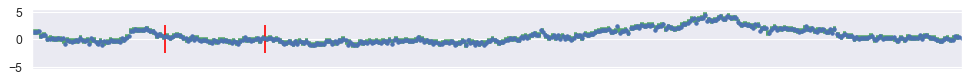

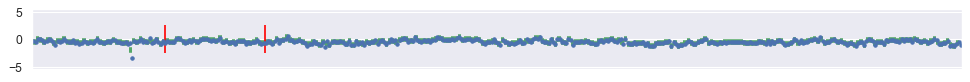

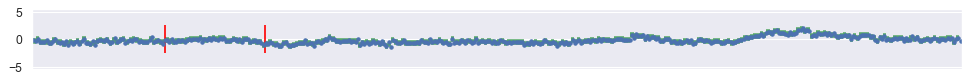

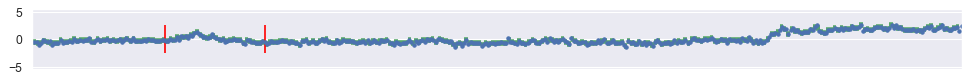

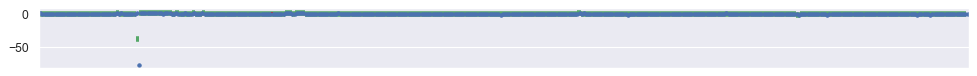

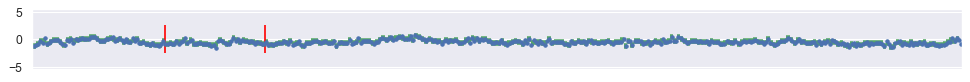

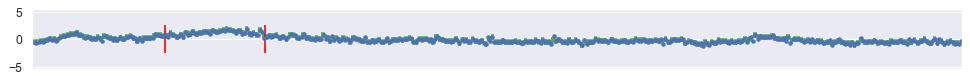

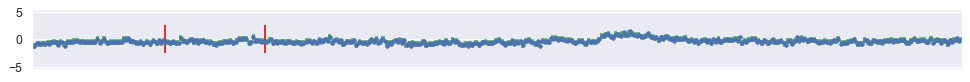

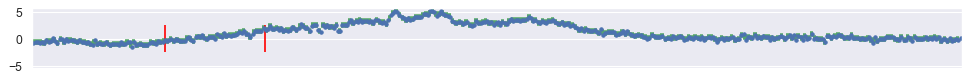

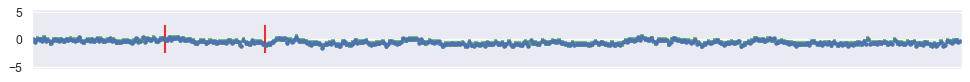

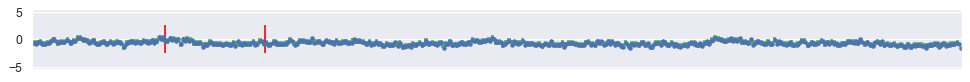

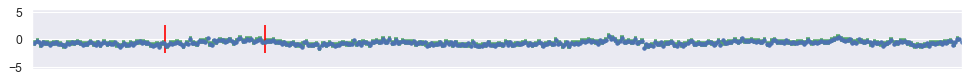

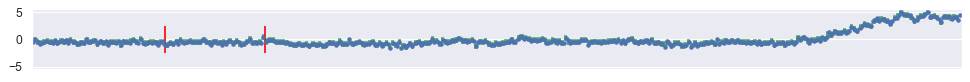

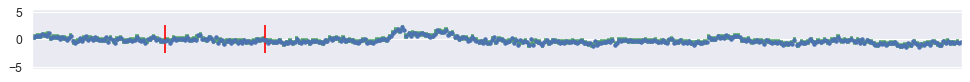

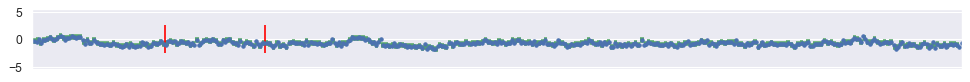

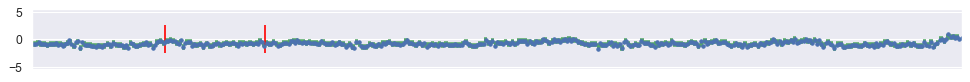

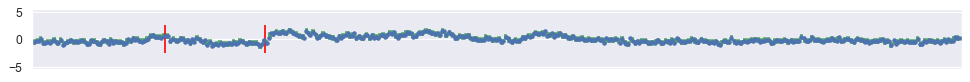

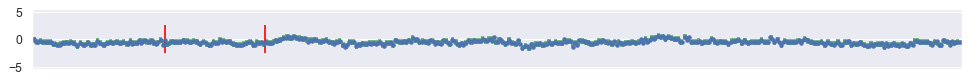

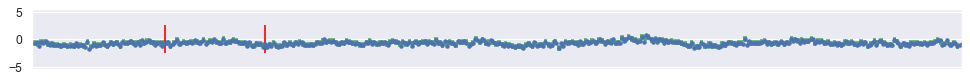

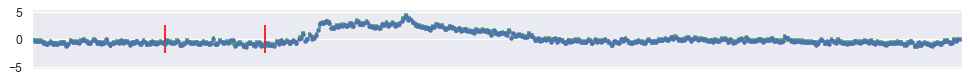

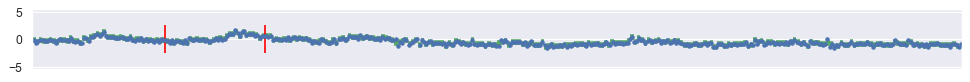

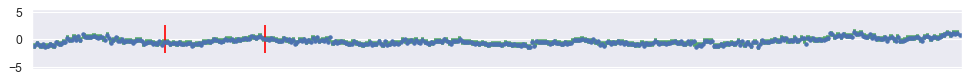

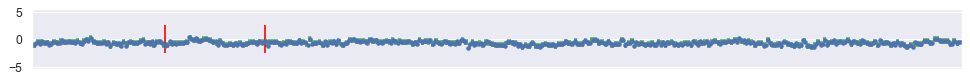

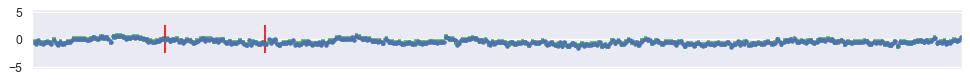

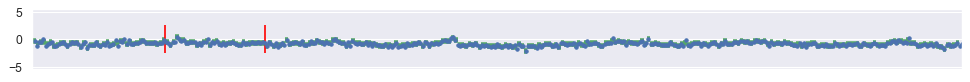

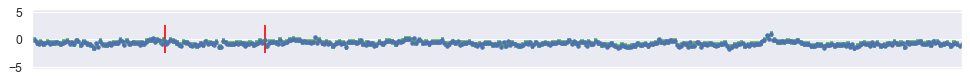

In [20]:
# plt each trials
from scipy import stats
import matplotlib.pyplot as plt
time_wid = [-2,12]
bin_step = 0.05 # 0.05s
bins_arr = np.arange(time_wid[0],time_wid[1],bin_step)
transient_matrix = np.ones((len(trial_on_time),len(bins_arr)-1))
#print(np.shape(transient_matrix))
#transient_matrix = []
#figure(figsize=(15,60), dpi=300)
aa = [];
print(len(cue_on_time))
trial_n = 0
#print(trial_on_time[0])
for i in cue_on_time:
    winStart  = i + time_wid[0] # 2s before cue
    winEnd    = i + time_wid[1]  # 12s after cue
    
    trancient = df_n.loc[(df_n["time"] > winStart) & (df_n["time"] <  winEnd)]
    #print(trancient)
    t_reset   = (trancient["time"]-i)

    figure(figsize=(15,1), dpi=80)
    #plt.subplot(len(cue_on_time), 1,trial_n+1)
    plt.plot(t_reset,trancient['data'], 'b.', label='data')
    #plt.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets=0,linelengths = 1)  
    #plt.ylim(-0.015, 0.015)
    plt.xticks([])
    plt.xlim(-2, 12)
    bin_means, bin_edges, binnumber = stats.binned_statistic(t_reset,
                trancient['data'], statistic = 'median',bins = bins_arr )
    #print(np.shape(bin_means))
    transient_matrix[trial_n,:] = bin_means
    #print(transient_matrix)
    trial_n = trial_n + 1
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors = 'g', lw = 5,
           label = 'binned statistic of data')
    #plt.legend()
    #plt.legend(loc='best')
    plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  
    plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  

    plt.show() 


In [21]:
bins_arr = np.arange(time_wid[0],time_wid[1]+1,bin_step)
len(bins_arr)

300

198
[  1  21  41  61  81 101 121 141 161 181]
[  0  20  40  60  80 100 120 140 160 180]
40.0
(279,)
280


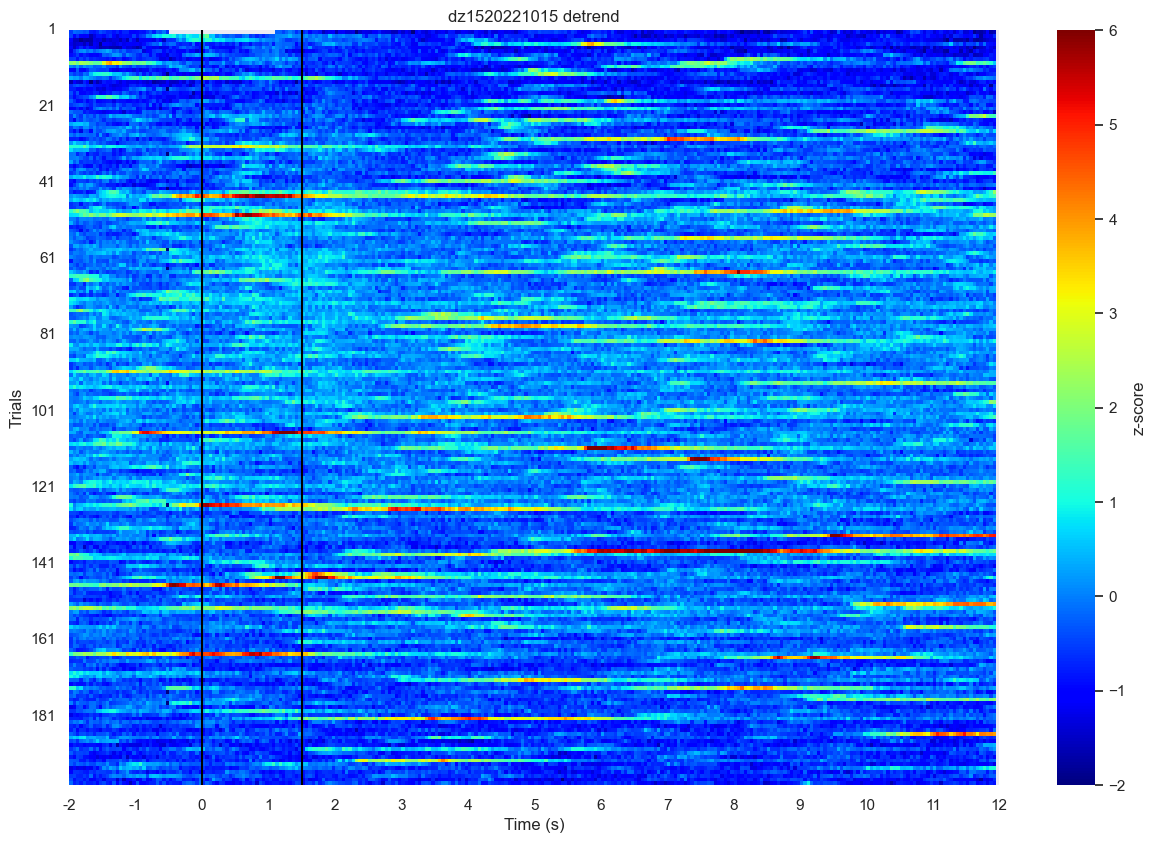

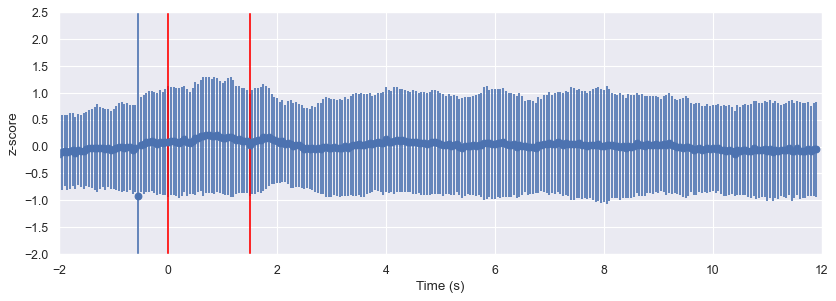

In [22]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
figure(figsize=(15,10), dpi=100)
tickstep = 1# step = 1s
bin_step = 0.05 # 0.05s
xticklab = np.arange(time_wid[0],time_wid[1]+1,tickstep)
#print(xticklab)
xtick = np.arange(0,(time_wid[1]-time_wid[0])/bin_step+1,tickstep/bin_step)
xtick_int = xtick.astype(int)
#print(xtick_int)
ytick_step = 20
print(len(trial_on_time))
ytick =  np.arange(0,len(trial_on_time)+1,ytick_step)
yticklab =  np.arange(1,len(trial_on_time)+2,ytick_step)
print(yticklab)
print(ytick)

#sns.color_palette("coolwarm", as_cmap=True)
#cmap="YlGnBu"
#ax = sns.heatmap( transient_matrix,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'})
ax = sns.heatmap( transient_matrix,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'},cmap="jet")


cueon_bin = abs(time_wid[0])/bin_step
plt.xticks(xtick_int,labels =  xticklab)
plt.yticks(ytick,labels =  yticklab)
plt.xticks(rotation=0)
print(cueon_bin)
cueoff_bin = (abs(time_wid[0])+1.5)/bin_step
plt.eventplot([cueoff_bin], color = colorCodes[0,:], lineoffsets=0,linelengths = 800)  
plt.eventplot([cueon_bin],  color = colorCodes[0,:], lineoffsets=0,linelengths = 800) 
plt.ylabel('Trials')
plt.xlabel('Time (s)')
plt.title(fn[0:-1]+' detrend')
#plt.scalebar('zscore')

import statistics

figure(figsize=(12.3,4), dpi=80)
#fig, a0 = plt.subplots(2, 1, figsize=(7, 5), gridspec_kw={'height_ratios': [.75, .25]})
#print(rw_transient_mat)

average_trace = np.nanmean(transient_matrix, axis=0)
std_trace = np.nanstd(transient_matrix, axis=0)
print(np.shape(average_trace))
print(len(bin_edges))
plt.errorbar(bin_edges[0:-1], average_trace,std_trace,fmt ='o')
plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  
plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  
plt.ylabel('z-score')
plt.xlabel('Time (s)')
plt.ylim(-2,2.5)
plt.xlim(-2,12)
plt.show() 

In [23]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:01:04.994548
